In [1]:
import scanpy, numpy
import matplotlib

# read data

In [2]:
%%time
input_file = '/home/adrian/scratch/zscore.tsv'
adata = scanpy.read_csv(input_file, delimiter='\t')
adata

CPU times: user 44.6 s, sys: 644 ms, total: 45.3 s
Wall time: 45.3 s


AnnData object with n_obs × n_vars = 46490 × 4385

In [3]:
iso1 = 'ENST00000354449.7'
iso2 = 'ENST00000354956.9'

# PCA

In [4]:
scanpy.tl.pca(adata, n_comps=100)

# paga exploration

In [5]:
nei = 5
dist = 0
spre = 10

/home/adrian/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/home/adrian/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


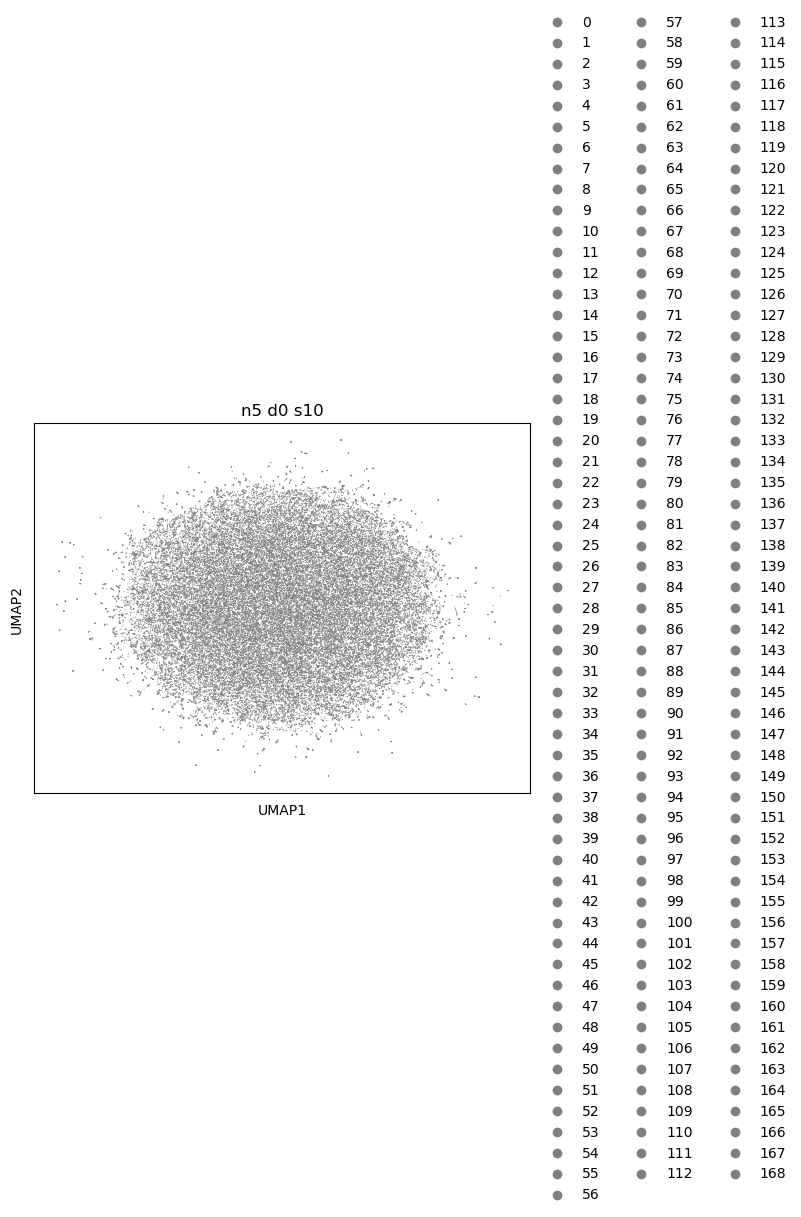

CPU times: user 49.2 s, sys: 1.5 s, total: 50.7 s
Wall time: 25.5 s


In [6]:
%%time

scanpy.pp.neighbors(adata, n_neighbors=nei, n_pcs=100)
scanpy.tl.umap(adata, min_dist=dist, spread=spre)
scanpy.tl.leiden(adata)
scanpy.pl.umap(adata, color=['leiden'], title='n{} d{} s{}'.format(nei, dist, spre))

# paga

/home/adrian/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


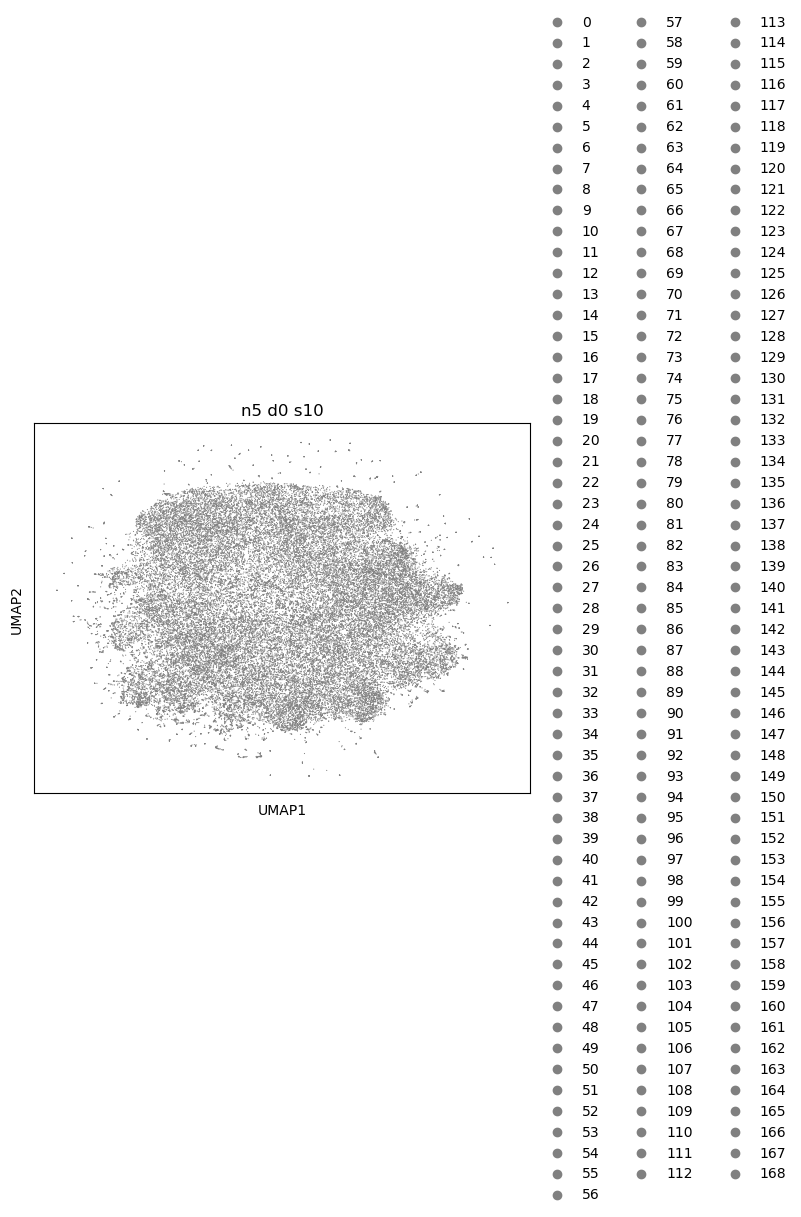

CPU times: user 25.7 s, sys: 1.34 s, total: 27 s
Wall time: 22.3 s


In [7]:
%%time

scanpy.pp.neighbors(adata, n_neighbors=nei, n_pcs=100)

scanpy.tl.paga(adata)
scanpy.pl.paga(adata, plot=False)

scanpy.tl.umap(adata, min_dist=dist, spread=spre, init_pos='paga')
scanpy.tl.leiden(adata)
scanpy.pl.umap(adata, color=['leiden'], title='n{} d{} s{}'.format(nei, dist, spre))

# highlight isoforms

/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


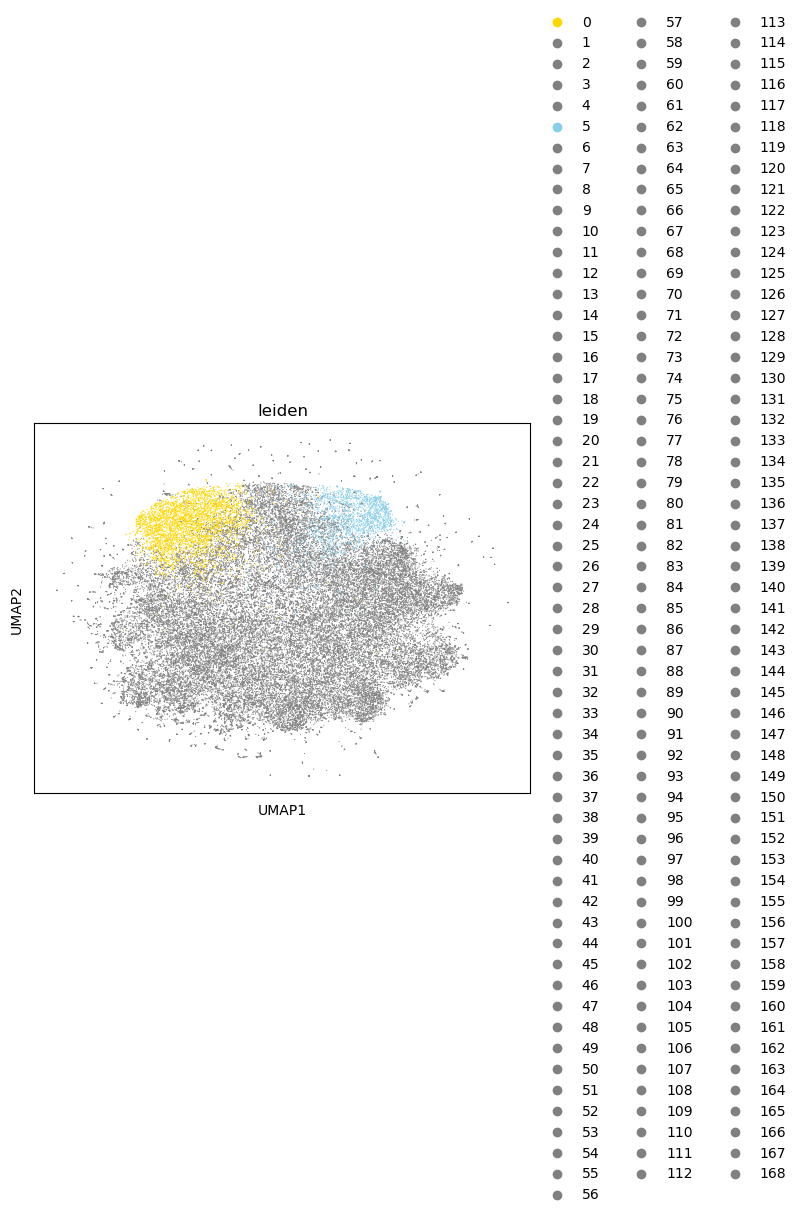

In [8]:
my_colors = []
for category in range(len(adata.obs['leiden'].cat.categories)):
    if str(category) == adata.obs['leiden'][iso1]:
        my_colors.append('skyblue')
    elif str(category) == adata.obs['leiden'][iso2]:
        my_colors.append('gold')
    else:
        my_colors.append('grey')
        
scanpy.pl.umap(adata, color='leiden', palette=my_colors)

/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


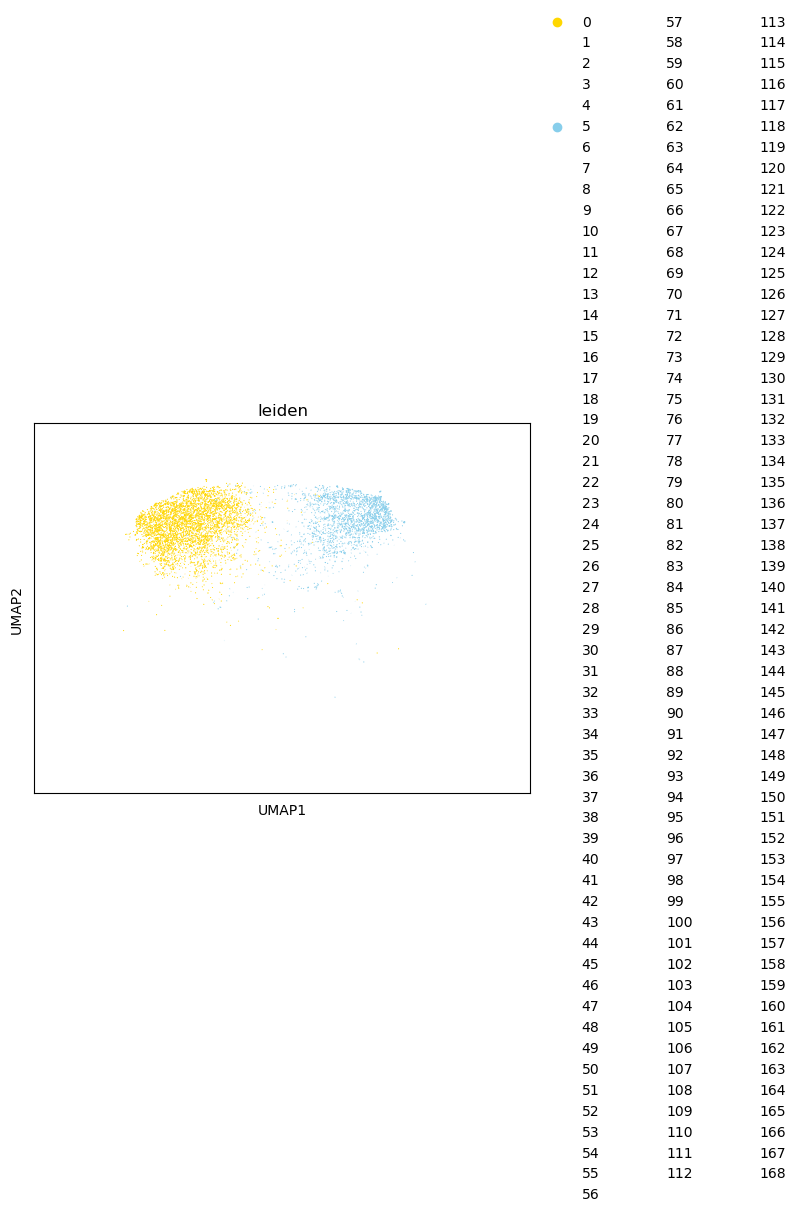

In [9]:
my_colors = []
for category in range(len(adata.obs['leiden'].cat.categories)):
    if str(category) == adata.obs['leiden'][iso1]:
        my_colors.append('skyblue')
    elif str(category) == adata.obs['leiden'][iso2]:
        my_colors.append('gold')
    else:
        my_colors.append('white')
        
scanpy.pl.umap(adata, color='leiden', palette=my_colors)

# highlight isoforms

/home/adrian/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


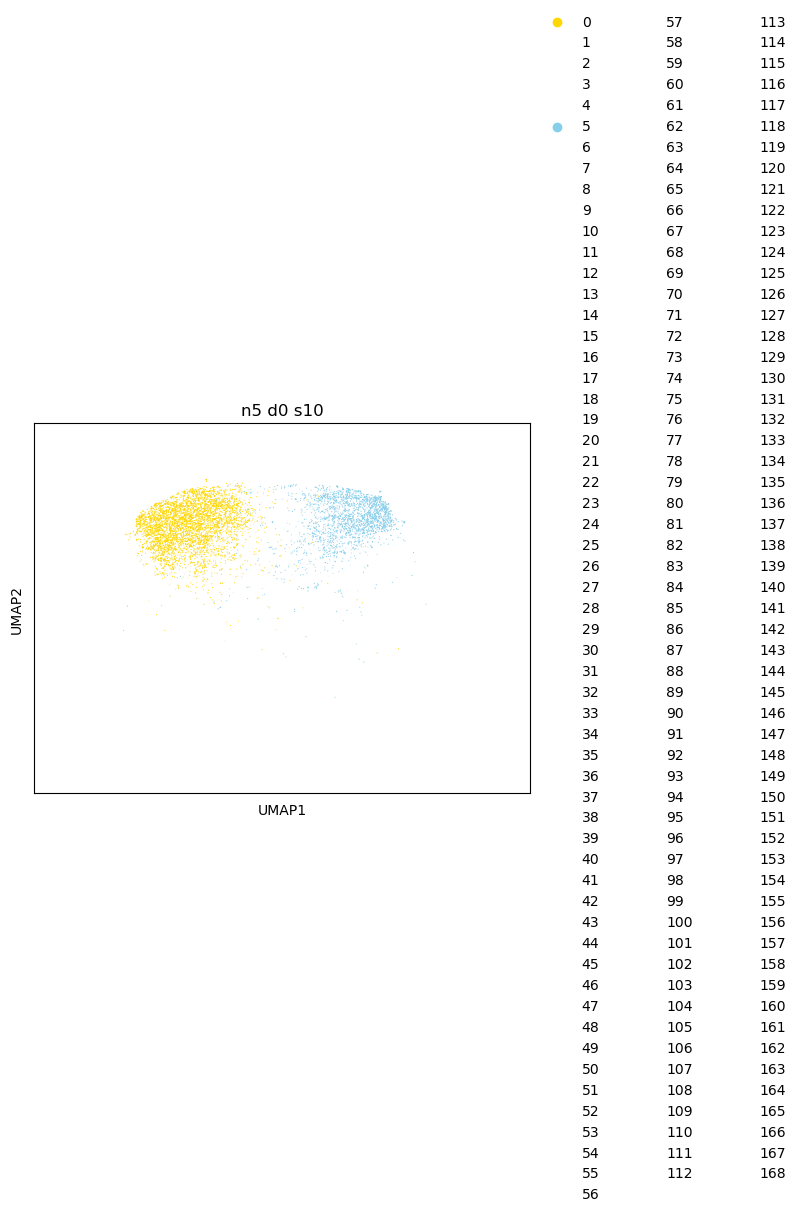

CPU times: user 26.2 s, sys: 1.24 s, total: 27.5 s
Wall time: 22.9 s


In [10]:
%%time

scanpy.pp.neighbors(adata, n_neighbors=5, n_pcs=100)

scanpy.tl.paga(adata)
scanpy.pl.paga(adata, plot=False)

scanpy.tl.umap(adata, min_dist=0, spread=10, init_pos='paga')
scanpy.tl.leiden(adata)
scanpy.pl.umap(adata, color=['leiden'], title='n5 d0 s10')

/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


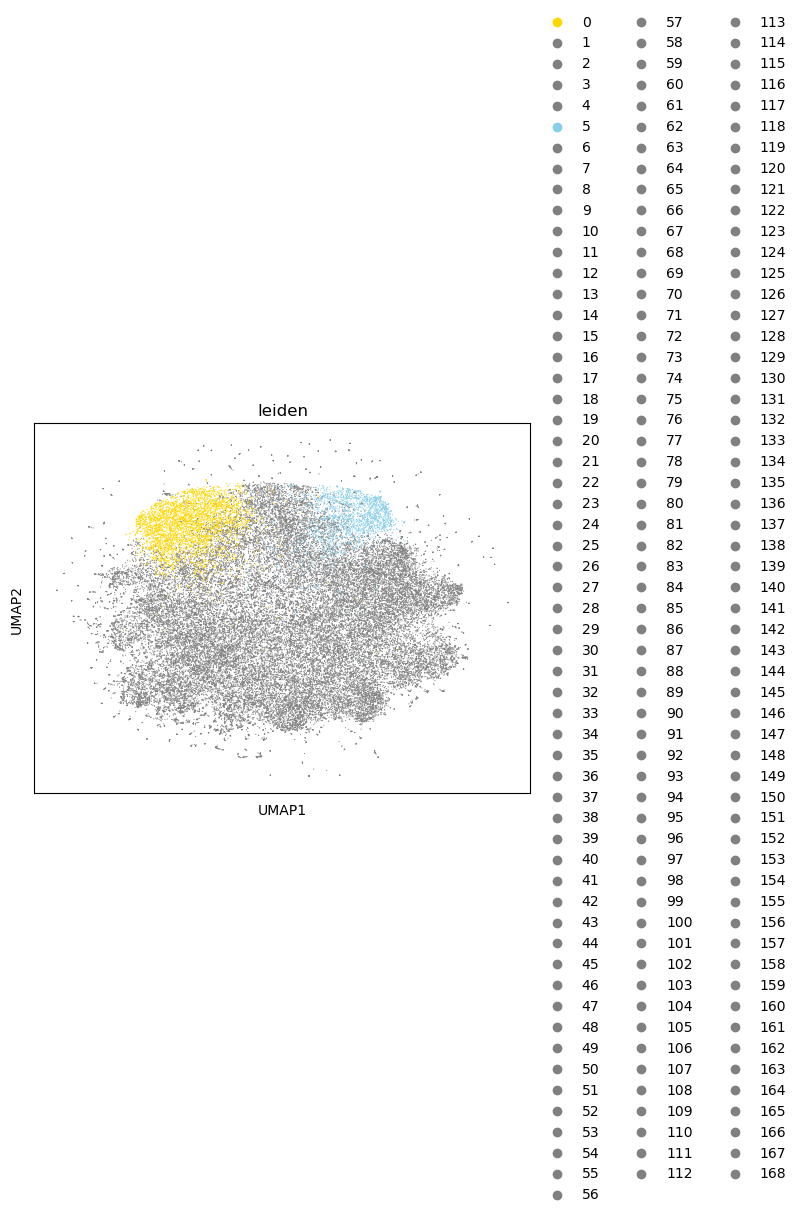

In [11]:
my_colors = []
for category in range(len(adata.obs['leiden'].cat.categories)):
    if str(category) == adata.obs['leiden'][iso1]:
        my_colors.append('skyblue')
    elif str(category) == adata.obs['leiden'][iso2]:
        my_colors.append('gold')
    else:
        my_colors.append('grey')
        
scanpy.pl.umap(adata, color='leiden', palette=my_colors)

# leiden resolution

In [12]:
print(adata.obs.index.get_loc(iso1))
print(adata.obs.index.get_loc(iso2))

25128
18310


/home/adrian/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/home/adrian/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


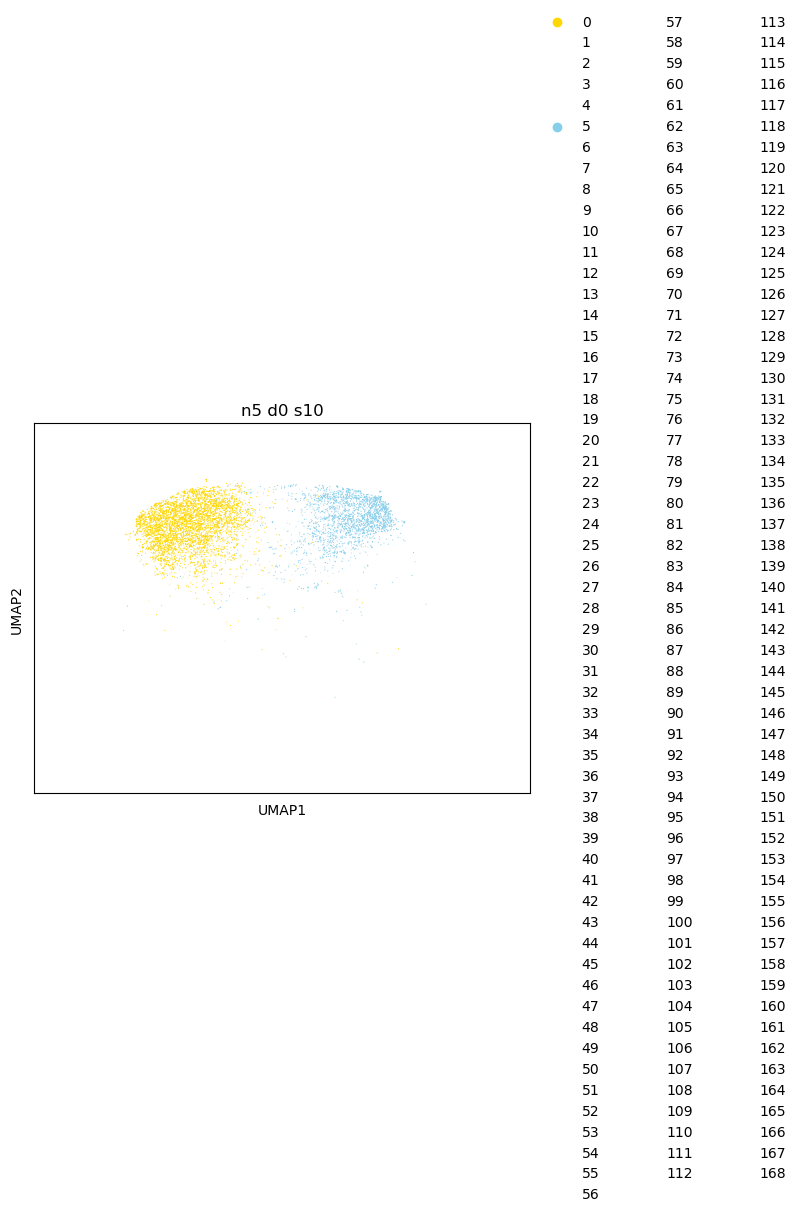

CPU times: user 26.6 s, sys: 1.5 s, total: 28.1 s
Wall time: 23.6 s


In [13]:
%%time 

# try a larger spread

neis = [5]
dists = [0]
spres = [10]

for nei in neis:
    for dist in dists:
        for spre in spres:
    
            scanpy.pp.neighbors(adata, n_neighbors=nei, n_pcs=100)
            scanpy.tl.paga(adata)
            scanpy.pl.paga(adata, plot=False)
            scanpy.tl.umap(adata, min_dist=dist, spread=spre, init_pos='paga')
            scanpy.tl.leiden(adata)

            # set colors
            my_colors = []
            for category in range(len(adata.obs['leiden'].cat.categories)):
                if str(category) == adata.obs['leiden'][iso1]:
                    my_colors.append('skyblue')
                elif str(category) == adata.obs['leiden'][iso2]:
                    my_colors.append('gold')
                else:
                    my_colors.append('white')

            # plot
            scanpy.pl.umap(adata, color='leiden', palette=my_colors, title='n{} d{} s{}'.format(nei, dist, spre))

In [14]:
scanpy.pp.neighbors(adata, n_neighbors=5, n_pcs=100, key_added='nei_5')
scanpy.pp.neighbors(adata, n_neighbors=10, n_pcs=100, key_added='nei_10')
scanpy.pp.neighbors(adata, n_neighbors=50, n_pcs=100, key_added='nei_50')
scanpy.pp.neighbors(adata, n_neighbors=100, n_pcs=100, key_added='nei_100')

In [15]:
scanpy.tl.leiden(adata, neighbors_key='nei_5')
print(len(adata.obs['leiden'].cat.categories))

169


In [16]:
scanpy.tl.leiden(adata, neighbors_key='nei_10')
print(len(adata.obs['leiden'].cat.categories))

79


In [17]:
resolutions = numpy.arange(0.1, 2, 0.3)
resolutions

array([0.1, 0.4, 0.7, 1. , 1.3, 1.6, 1.9])